# IA353 - Redes Neurais
# EFC4 - Questão 10
# Processamento de Linguagem Natural - Word Embedding

##### **Based on https://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.Xwa18pWSncc**
##### **Based on https://github.com/kavgan/nlp-in-practice/blob/master/word2vec/Word2Vec.ipynb**
##### **Based on https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial**


**Professor:** Fernando J. Von Zuben

**Aluno(a)**: Guilherme Rosa

### **I. Word Embedding e Espaço de Codificação Densa:**

- *Word embedding* é o nome dado ao conjunto de técnicas de processamento de linguagem natural (NLP, do inglês *Natural Language Processing*) em que palavras são representadas matematicamente por vetores reais em um espaço de codificação densa.

- A representação de palavras no espaço de codificação densa é feita de modo que as noções de distância e vizinhança entre os vetores que as representam capturem aspetos semânticos, sintáticos, morfológicos e pragmáticos da linguagem. Exemplos:

  - Palavras relacionadas a animais de estimação, como gato, cachorro e pássaro, possuem representações próximas.
  - Um verbo e suas conjugações possuem representações próximas.
  - Uma palavra que indica cor e outra que indica nome de um país podem ter suas representações bem distantes.

- Ainda, com um espaço de codificação densa adequadamente gerado é possível realizar operações matemáticas entre os vetores e obter resultados que fazem sentido com relação aos aspectos citados anteriormente. Exemplos:

  - A soma entre o vetor que representa "França" e o que representa "capital" leva a um vetor bem próximo àquele que representa "Paris".
  - A distância entre os vetores que representam "Rei" e "homem" é igual a distância entre os vetores que representam "Rainha" e "mulher".
  - Se deslocar de um ponto inicial que representa um verbo no presente para um ponto final que representa o mesmo verbo no passado, ao realizar o mesmo deslocamento a partir de outro verbo no presente, o resultado também será o outro verbo no passado.



### **II. Conceitos básicos:**

- Esta seção foi baseada na documentação do Gensim: https://radimrehurek.com/gensim/auto_examples/core/run_core_concepts.html#sphx-glr-auto-examples-core-run-core-concepts-py

- Antes de apresentar a arquitetura e funcionamento do word2vec é necessário definir alguns conceitos básicos da área de NLP.

- **Documento:** é um objeto do tipo string, podendo ser uma sentença, parágrafo, texto, livro etc.
  - Exemplo: um review do dataset OpinRank.

- **Corpus:** é uma coleção de documentos.
  - Exemplo: o conjunto de todos os reviews do dataset OpinRank.

- **Tokenização:** tokenizar um documento é o processo de criar uma lista em que cada elemento (token) é uma palavra do documento.
  - Geralmente é feita uma etapa de pré-processamento a fim de diminuir as dimensões do problema e melhorar o desempenho da técnica de *word embedding*.
  - Exemplos de pré-processamento:
    - Remoção da acentuação
    - Remoção de palavras que aparecem com muita frequência
    - Remoção de palavras que aparecem uma única vez no corpus


- **Vocabulário:** é o conjunto formado por todos os tokens do corpus sem repetição. Cada token possui um identificador (número inteiro).

### **III. Word2vec:**

- É uma técnica linear e escalável de *word embedding* proposta por MIKOLOV et. al.

- Sua estrutura é dada por uma rede neural MLP com uma camada intermediária e função de ativação identidade.

- Seu espaço de codificação densa tem dimensão de 50 a 300 unidades (é a saída da camada intermediária da rede MLP).

- Os modelos utilizados para obtenção do word2vec são: *Continous Bag of Words* e *Skip-Gram*.

- No modelo *Continous Bag of Words* a tarefa consiste em prever a palavra central dado um conjunto de palavras vizinhas (contexto). 

- No modelo *Skip-Gram* a tarefa consiste em prever o conjunto de palavras vizinhas (contexto) dada a palavra central.

- As explicações abaixo são baseadas nos seguintes materiais:

  - http://cs224d.stanford.edu/lecture_notes/notes1.pdf 

  - http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/ 

  - https://towardsdatascience.com/nlp-101-word2vec-skip-gram-and-cbow-93512ee24314 

  - *Paper I - Efficient Estimation of Word Representations in
Vector Space*: https://arxiv.org/pdf/1301.3781.pdf

  - *Paper II - Distributed Representations of Words and Phrases
and their Compositionality*: https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf 

#### **Parte 1 - *Continuous Bag of Words* - CBOW:**

- Como apresentado anteriormente, a tarefa no treinamento do modelo CBOW consiste em prever a palavra central dado um conjunto de palavras vizinhas (contexto).

- Construção do conjunto de amostras de treinamento:

  - Considere um vocabulário com ${N}_v$ palavras.
  - Considere também o seguinte documento: "The quick brown fox jumps over the lazy dog".
  - Se definirmos, por exemplo, uma janela de tamanho ${N}_w = 2$, podemos criar os seguintes pares entrada-saída:

    - [("*The*", "*quick*", "*fox*", "*jumps*"), "*brown*"]
    - [("*quick*", "*brown*", "*jumps*", "*over*"), "*fox*"]
    - [("*brown*", "*fox*", "*over*", "*the*"), "*jumps*"]
    - [("*fox*", "*jumps*", "*the*", "*lazy*"), "*over*"]
    - [("*jumps*", "*over*", "*lazy*", "*dog*"), "*the*"]

  - O primeiro elemento da lista é o conjunto de palavras de entrada (contexto) e o segundo elemento é a palavra central a ser predita.
  - Em seguida é feita a codificação *one-hot* para cada palavra do contexto e da saída. 
  - O vetor *one-hot* possui ${N}_v$ elementos, sendo que o valor $1$ é atribuído à posição referente ao identificador da palavra no vocabulário.
  - O conjunto de amostras de treinamento é formado pelos pares entrada-saída obtidos por meio da aplicação do procedimento acima para todos os documentos do corpus.

- Estrutura do modelo:

  - A entrada é um vetor-linha de dimensão $1 \times {N}_v$.
  - A camada intermediária é formada por $M$ neurônios com função de ativação identidade. Sua matriz de pesos tem ${N}_v$ linhas e $M$ colunas. 
  - A camada de saída é do tipo *softmax* formada por ${N}_v$ neurônios. Assim, cada neurônio de saída se refere a uma palavra do vocabulário e cada neurônio fornece a probabilidade de uma das palavras do vocabulário ser a palavra central, dado o contexto na entrada. Sua matriz de pesos tem $M$ linhas e ${N}_v$ colunas. 
  - A saída é um vetor-linha de dimensão $1 \times {N}_v$ contendo as probabilidades.
  - O critério a ser otimizado é o da entropia-cruzada.

- Funcionamento do modelo para uma amostra de treinamento:

  - Cada vetor *one-hot* pertencente ao contexto é aplicado à entrada da rede, levando cada palavra a sua respectiva representação no espaço de codificação densa. No nosso exemplo, 4 vetores *one-hot* são apresentados ao modelo, gerando 4 vetores no espaço de codificação densa.
  - Em seguida, é tomada uma média dos vetores no espaço de codificação densa gerando um vetor resultante (Outras operações podem ser feitas no lugar da média).
  - Esse vetor resultante é aplicado à camada de saída, produzindo as probabilidades para cada palavra do vocabulário.

- O treinamento dessa rede é feito por meio de técnicas de gradiente.

- Após o treinamento a camada de saída é removida e a matriz de pesos da camada intermediária corresponde ao mapeamento linear realizado pelo Word2vec.

#### **Parte 2 - *Skip-Gram*:**

- A tarefa no treinamento do modelo *Skip-Gram* consiste em prever as palavras vizinhas (contexto) dada a palavra central.

- Construção do conjunto de amostras de treinamento:

  - Considere um vocabulário com ${N}_v$ palavras.
  - Considere também o seguinte documento: "The quick brown fox jumps over the lazy dog".
  - Se definirmos, por exemplo, uma janela de tamanho ${N}_w = 2$, podemos criar os seguintes pares entrada-saída:

    - ["*The*", "*quick*"], ["*The*", "*brown*"]
    - ["*quick*", "*The*"], ["*quick*", "*brown*"], ["*quick*", "*fox*"]
    - ["*brown*", "*The*"], ["*brown*", "*quick*"], ["*brown*", "*fox*"], ["*brown*", "*jumps*"]
    - ["*fox*", "*quick*"], ["*fox*", "*brown*"], ["*fox*", "*jumps*"], ["*fox*", "*over*"]
    - ["*jumps*", "*brown*"], ["*jumps*", "*fox*"], ["*jumps*", "*over*"], ["*jumps*", "*the*"]
    - ["*over*", "*fox*"], ["*over*", "*jumps*"], ["*over*", "*the*"], ["*over*", "*the*"]
    - ["*the*", "*jumps*"], ["*the*", "*over*"], ["*the*", "*lazy*"], ["*the*", "*dog*"]
    - ["*lazy*", "*over*"], ["*lazy*", "*the*"], ["*lazy*", "*dog*"]
    - ["*dog*", "*the*"], ["*dog*", "*lazy*"]

  - O primeiro elemento da lista é a palavra central e o segundo elemento é uma das palavras vizinhas a ser predita.
  - Em seguida é feita a codificação *one-hot* para cada palavra de entrada e de saída. 
  - O vetor *one-hot* possui ${N}_v$ elementos, sendo que o valor $1$ é atribuído à posição referente ao identificador da palavra no vocabulário.
  - O conjunto de amostras de treinamento é formado pelos pares entrada-saída obtidos por meio da aplicação do procedimento acima para todos os documentos do corpus.

- Estrutura do modelo:

  - A entrada é um vetor-linha de dimensão $1 \times {N}_v$.
  - A camada intermediária é formada por $M$ neurônios com função de ativação identidade. Sua matriz de pesos tem ${N}_v$ linhas e $M$ colunas. 
  - A camada de saída é do tipo *softmax* formada por ${N}_v$ neurônios. Assim, cada neurônio de saída se refere a uma palavra do vocabulário e a camada fornece a probabilidade de cada uma das palavras do vocabulário ser a palavra vizinha, dada a palavra central na entrada. Sua matriz de pesos tem $M$ linhas e ${N}_v$ colunas. 
  - A saída é um vetor-linha de dimensão $1 \times {N}_v$ contendo as probabilidades.
  - O critério a ser otimizado é a da entropia-cruzada, mas assumindo que as ocorrências de cada palavra vizinha de uma palavra central são independentes umas das outras.

- Funcionamento do modelo para uma amostra de treinamento:

  - O vetor *one-hot* referente à palavra central é aplicada à entrada da rede, gerando sua representação no espaço de codificação densa.
  - Em seguida, o vetor no espaço de codificação densa é aplicado à camada de saída, produzindo as probabilidades para cada palavra do vocabulário.
  - Como há mais de uma saída possível para uma palavra central, o vetor de probabilidades gerado pela rede possui um erro associado a cada possível palavra vizinha.
  - Assim, é feita a soma de todos os erros gerando um vetor de erro resultante, que por sua vez é retropropagado durante o treinamento.

- O treinamento dessa rede é feito por meio de técnicas de gradiente.

- Após o treinamento a camada de saída é removida e a matriz de pesos da camada intermediária corresponde ao mapeamento linear realizado pelo Word2vec.

- Obs: Para melhorar o treinamento de ambas as redes, os mesmos autores apresentaram algumas modificações:
  
  - *Subsampling*: visa diminuir o número de amostras de treinamento. Considera que palavras que aparecem com muita frequência não fornecem muita informação para a construção do espaço de codificação densa.
  - *Negative Sampling*: é uma alteração na função objetivo de modo que para cada amostra de treinamento é feita a atualização de uma pequena parcela de pesos do modelo. 


### **IV. t-SNE:**

- As explicações a seguir são baseadas nos seguintes materiais:

  - https://observablehq.com/@robstelling/abrindo-a-caixa-preta-do-t-sne/2#tsneAlgoritmo1
  - https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/
  - *Paper: Visualizing Data using t-SNE*: http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

- t-SNE (*t-Distributed Stochastic Neighbor Embedding*) é uma técnica não-linear e não-supervisionada de redução de dimensionalidade que permite a visualização de dados de alta dimensão em espaços de baixa dimensão (geralmente 1 ou 2).

- A apresentação da técnica pode ser separada em três partes:

  - Na primeira parte, cada dado ${x}_i$ no espaço de alta dimensão pode ser visto como o centro de uma distribuição normal com média nula e variância ${\sigma}_i$ que converte a distância entre os dados em probabilidades. Essas medidas de probabilidade carregam informações de vizinhança (similaridade) dos dados no espaço de alta dimensão.

  - Na segunda parte, cada dado ${y}_i$ gerado aleatoriamente no espaço de dimensão reduzida pode ser visto como o centro de uma distribuição *t-Student* com um grau de liberdade que, da mesma forma, converte distâncias entre os dados em probabilidades. Essas medidas de probabilidade carregam informações de vizinhança (similaridade) dos dados no espaço de dimensão reduzida.

  - Na terceira parte é realizado o treinamento não-supervisionado da técnica, em que se busca minimizar a divergência de Kullback-Leibler entre as distribuições por meio de técnicas de gradiente. Esta etapa visa aproximar as distribuições t-Student às distribuições normais para cada par {${x}_i$, ${y}_i$} e, assim, as noções de vizinhança do espaço de alta dimensão são capturadas e podem ser visualizadas no espaço de dimensão reduzida. 

#### **Parte 1:**

- Considere um conjunto de $N$ dados num espaço de alta dimensão.

- Cada dado pode ser visto como o centro de uma distribuição normal de média nula e variância ${\sigma}_i$ (cujo valor é diferente para cada dado ${x}_i$). 

- Para dois dados ${x}_i$ e ${x}_j$, a probabilidade do ponto ${x}_j$ estar próximo ao ponto ${x}_i$ é dada por:

$$
{p}_{ij} = \frac{exp(-{||{x}_i-{x}_j||}^2/2{{\sigma}_i}^2)}{\sum_{k \neq i}{exp(-{||{x}_i-{x}_k||}^2/2{{\sigma}_i}^2)}}
$$

- O cálculo da distância entre os dois pontos pode ser feito utilizando qualquer tipo de norma.

- As distribuições possuem variâncias distintas para que cada dado ${x}_i$ tenha a mesma quantidade de pontos vizinhos. Assim, dados que se encontram em uma região com alta densidade de pontos tendem a possuir distribuições com variâncias menores, enquanto dados que se encontram em regiões com baixa densidade de pontos tendem a possuir distribuições com variâncias maiores.

- O cálculo das variâncias é feita por meio de buscas binárias. Primeiro é definido o hiperparâmetro Perplexidade ($Perp$) que indica a dispersão ao redor de um dado ${x}_i$ (e em última instância, o número de vizinhos do dado).

- A Perplexidade define a Entropia desejada para a distribuição ${p}_{ij}$:

$$
Entropia = log_{2}{(Perp)} = \sum_{k \neq i}{-{p}_{ij}{log}_2{({p}_{ij}})}
$$

- Para cada $i = 1, ..., N$ faz-se uma busca pelo valor de variância que aproxime a entropia de cada distribuição ao valor desejado de entropia.

#### **Parte 2:**

- Agora considere um conjunto de $N$ dados aleatoriamente gerados num espaço de dimensão reduzida por meio de uma distribuição normal de média nula e variância $10^{-4}$ (conforme proposto pelos autores da técnica).

$$
\gamma^{(1)} = \{y_1, ..., y_N\} 
$$

- Cada dado ${y}_i$ pode ser visto como o centro de uma distribuição *t-Student* com um grau de liberdade.

- Para dois dados ${y}_i$ e ${y}_j$, a probabilidade do ponto ${y}_j$ estar próximo do ponto ${y}_i$ é dada por:

$$
{q}_{ij} = \frac{(1 + ||{y}_i-{y}_j||^2)^{-1}}{\sum_{k \neq l}(1 + ||{y}_k-{y}_l||^2)^{-1}}
$$

- Neste caso, a distribuição *t-Student* é escolhida no lugar da distribuição normal pois sua "cauda" é mais longa e, consequentemente, os dados no espaço de dimensão reduzida são mapeados de forma mais espalhada (é uma forma de diminuir o problema de aglomeração de pontos durante a redução de dimensionalidade).

#### **Parte 3:**

- O problema de otimização a ser resolvido tem como função custo a Divergência de Kullback-Leibler, que pode ser vista como uma "medida de diferença" entre distribuições de probabilidade.

- O objetivo nesta tarefa é minimizar a Divergência de Kullback-Leibler de modo que as distribuições *t-Students* no espaço de dimensão reduzida se aproximem das distribuições normais no espaço de alta dimensão.

- A função custo é dada por:

$$
C = \sum_i\sum_jp_{ij}log(\frac{p_{ij}}{q_{ij}})
$$

- Os parâmetros ajustáveis do modelo são as coordenadas dos vetores $y_{i}$ do espaço de dimensão reduzida.

- Os elementos do vetor gradiente da função custo $C$ em relação aos elementos de $\gamma^{(t)}$ é dada por:

$$
\frac{\partial{C}}{\partial{y_i}} = 4{\sum_j{(p_{ij}-q_{ij})(y_{i}-y_{j})(1 + ||y_{i}-y_{j}||^2)^{-1}}}
$$
- Por fim, a regra de atualização dos parâmetros pode ser feita utilizando o método de gradiente + momentum, conforme abaixo:

$$
\gamma^{(t)} = \gamma^{(t-1)} + \eta\frac{\partial{C}}{\partial{\gamma}} + \alpha^{(t)}(\gamma^{(t-1)} - \gamma^{(t-2)})
$$

- onde $\eta$ é o *learning rate*, $\alpha(t)$ é o *momentum* e $T$ é o número de iterações.
  


In [ ]:
!pip install --upgrade gensim

### **1. Importações**

In [ ]:
# Imports needed and logging
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import gzip
import gensim 
import logging

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/Colab Notebooks/'

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

### **2. Leitura e pré-processamento da base de dados**

In [ ]:
data_file = path + "EFC4/reviews_data.txt.gz" # Please, define the working directory appropriately

with gzip.open (data_file, 'rb') as f:
    for i,line in enumerate (f):
        print(line)
        break

b"Oct 12 2009 \tNice trendy hotel location not too bad.\tI stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to see the historic sites in Be

In [ ]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list(read_input(data_file))
logging.info ("Done reading data file")

2020-07-16 20:03:03,353 : INFO : reading file /content/gdrive/My Drive/Colab Notebooks/EFC4/reviews_data.txt.gz...this may take a while
2020-07-16 20:03:03,356 : INFO : read 0 reviews
2020-07-16 20:03:05,887 : INFO : read 10000 reviews
2020-07-16 20:03:07,905 : INFO : read 20000 reviews
2020-07-16 20:03:10,234 : INFO : read 30000 reviews
2020-07-16 20:03:12,600 : INFO : read 40000 reviews
2020-07-16 20:03:15,058 : INFO : read 50000 reviews
2020-07-16 20:03:17,441 : INFO : read 60000 reviews
2020-07-16 20:03:19,421 : INFO : read 70000 reviews
2020-07-16 20:03:21,225 : INFO : read 80000 reviews
2020-07-16 20:03:23,116 : INFO : read 90000 reviews
2020-07-16 20:03:24,942 : INFO : read 100000 reviews
2020-07-16 20:03:26,763 : INFO : read 110000 reviews
2020-07-16 20:03:28,578 : INFO : read 120000 reviews
2020-07-16 20:03:30,947 : INFO : read 130000 reviews
2020-07-16 20:03:32,931 : INFO : read 140000 reviews
2020-07-16 20:03:34,747 : INFO : read 150000 reviews
2020-07-16 20:03:36,650 : INFO

### **3. Definição e treinamento do modelo Word2vec**

- Os parâmetros passados para o modelo são:

  - *documents*: lista de *reviews* do *dataset* Opinrank, em que cada *review* é dado por uma lista de tokens.
  - *size*: dimensão do espaço de codificação densa (número de neurônios da camada intermediária).
  - *window*: distância máxima entre a palavra central e a palavra do contexto.
  - *min_count*: número mínimo de vezes que o token deve aparecer no corpus para ser considerado no treinamento.
  - *workers*: número de *threads* utilizadas para treinar o modelo.
  - *sg*: define o algoritmo de treinamento (CBOW ou *Skip-Gram*).

- A construção do vocabulário é realizada na instanciação da classe Word2vec. 

In [ ]:
model = gensim.models.Word2Vec(documents, size=150, window=10, min_count=2, workers=10)
model.train(documents, total_examples=len(documents), epochs=10)

### **4. Relações entre palavras no espaço de codificação densa**


##### **4.1. Palavras mais similares à palavra *dirty*:**

- A célula abaixo apresenta as 10 palavras mais similares à palavra *dirty* de acordo com o espaço de codificação densa gerado.

- Ao analisar as palavras obtidas, nota-se que todas são adjetivos/substantivos que caracterizam situações e qualidades negativas e ruins, indicando que o espaço de codificação densa foi capaz de aprender a semântica das palavras.  

In [ ]:
w1 = "dirty"
model.wv.most_similar(positive=w1)

2020-07-16 20:24:46,607 : INFO : precomputing L2-norms of word weight vectors


[('filthy', 0.8740854263305664),
 ('stained', 0.7869531512260437),
 ('unclean', 0.7826015949249268),
 ('dusty', 0.7662882804870605),
 ('smelly', 0.7596171498298645),
 ('soiled', 0.7444313168525696),
 ('grubby', 0.740138053894043),
 ('dingy', 0.7395889759063721),
 ('gross', 0.7383311986923218),
 ('disgusting', 0.7190804481506348)]

##### **4.2. Palavras mais similares à palavra *polite*:**

- A célula abaixo apresenta as 6 palavras mais similares à palavra *polite* (educado) de acordo com o espaço de codificação densa gerado.

- Ao analisar as palavras obtidas, nota-se que todas são adjetivos/substantivos que caracterizam qualidades positivas tais como cortês, amigável, cordial etc. Novamente, o conjunto de palavras obtidos mostra que o espaço de codificação densa foi capaz de aprender a semântica das palavras.  

In [ ]:
w1 = ["polite"]
model.wv.most_similar(positive=w1,topn=6)

[('courteous', 0.9182446599006653),
 ('friendly', 0.8283568024635315),
 ('cordial', 0.8075278401374817),
 ('professional', 0.8041240572929382),
 ('attentive', 0.7747278809547424),
 ('curteous', 0.7696831226348877)]

##### **4.3. Palavras mais similares à palavra *france*:**

- A célula abaixo apresenta as 6 palavras mais similares à palavra *france* de acordo com o espaço de codificação densa gerado.

- Como pode ser observado, 4 das 6 palavras também são nomes de países, mostrando que elas foram mapeadas próximas umas as outras no espaço denso. 

- Levando em consideração que o *dataset* é composto por *reviews* de hotéis, pode-se inferir que a grande similaridade da *gaulle* com *france* deve-se aos reviews refentes aos hotéis próximos ao aeroporto francês Charles de Gaulle.

- Já a palavra *midwest* pode estar se referindo ou à região da Europa que a França se encontra ou mesmo uma região do próprio país.

In [ ]:
w1 = ["france"]
model.wv.most_similar(positive=w1,topn=6)

[('canada', 0.7072590589523315),
 ('germany', 0.6779245138168335),
 ('gaulle', 0.6435289978981018),
 ('spain', 0.6190057396888733),
 ('midwest', 0.6155171394348145),
 ('thailand', 0.6135806441307068)]

##### **4.4. Palavras mais similares à palavra *shocked*:**

- A célula abaixo apresenta as 6 palavras mais similares à palavra *shocked* de acordo com o espaço de codificação densa gerado.

- Observa-se que as palavras mais similares apresentadas são adjetivos relacionados à reações de espanto/desconforto, mostrando que esse conjunto de palavras com significados semelhantes também foram mapeados próximos.

In [ ]:
w1 = ["shocked"]
model.wv.most_similar(positive=w1,topn=6)

[('horrified', 0.8074371218681335),
 ('astonished', 0.7799125909805298),
 ('amazed', 0.7797226309776306),
 ('dismayed', 0.7555322647094727),
 ('appalled', 0.7463803887367249),
 ('stunned', 0.745787501335144)]

##### **4.5. Exemplo de operações aritméticas no espaço de codificação densa:**

- A operação realizada aqui é análoga a *king* + *woman* - *man* = *queen*.

- Neste exemplo, as palavras em $w_1$ contribuem positivamente no cálculo da similaridade, enquanto a palavra em $w_2$ contribui negativamente.

- Todas as palavras mais similares após o cálculo são itens de cama.

In [ ]:
w1 = ["bed",'sheet','pillow']
w2 = ['couch']
model.wv.most_similar(positive=w1,negative=w2,topn=10)

[('duvet', 0.7181714177131653),
 ('quilt', 0.6989838480949402),
 ('blanket', 0.6953476071357727),
 ('mattress', 0.6822869181632996),
 ('matress', 0.6734118461608887),
 ('foam', 0.644727349281311),
 ('sheets', 0.6398610472679138),
 ('pillowcase', 0.6316525936126709),
 ('pillows', 0.6278476715087891),
 ('pillowcases', 0.6149047613143921)]

##### **4.6. Similaridade entre as palavras *dirty* e *smelly*:**

- Aqui é apresentada a similaridade entre "dirty" e "smelly", um dos exemplos já discutidos na subseção 4.1. 

In [ ]:
model.wv.similarity(w1="dirty",w2="smelly")

0.7596172

##### **4.7. Exemplo de qual palavra da lista abaixo é empregada em um contexto diferente das demais:**

- Por fim, o método *doesn_match* retorna a palavra com a semântica mais diferente (palavra menos similar às demais).

In [ ]:
model.wv.doesnt_match(['bed','pillow','duvet','shower'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'shower'

### **5. Visualização do espaço de codificação densa utilizando a técnica de redução de dimensionalidade t-SNE**


In [ ]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 150), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 150 to 18 dimensions with PCA
    reduc = PCA(n_components=18).fit_transform(arrays)
    
    np.set_printoptions(suppress=True)
    
    # Finds t-SNE coordinates for 2 dimensions
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

##### **5.1. Visualização com a técnica t-SNE para a palavra *bed*:**

- Os pontos em azul são as palavras mais similares à *bed*, obtidas com o método *most_similar* da classe Word2vec.

- Os pontos em verde são as palavras passadas como parâmetro para a função *tsnescatterplot*, que pertencem a contextos diferentes.

- Como pode ser observado na figura abaixo, o t-SNE teve uma boa performance na preservação das noções de vizinhança entre as palavras no espaço de codificação densa.

- As palavras mais similares à *bed* foram mapeadas próximas à ela no gráfico abaixo, sendo o único problema o ponto referente à palavra *Thorn*, que possui uma similaridade menor que as palavras *bedwas* e *daybed*, mas está mapeada mais próxima à *bed*.

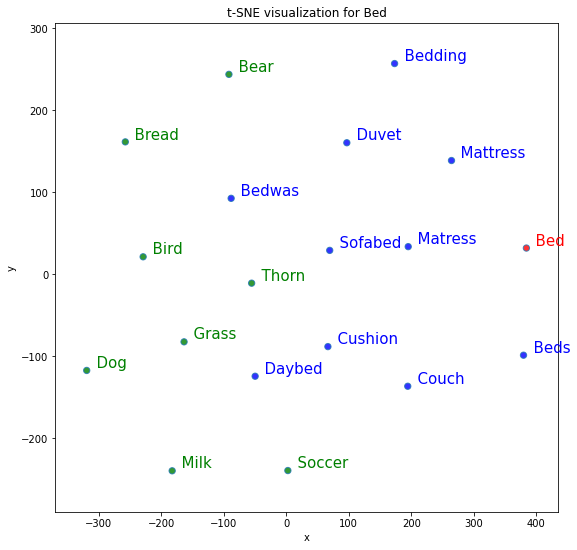

In [ ]:
tsnescatterplot(model, 'bed', ['dog', 'bird', 'grass', 'milk', 'soccer', 'bread', 'thorn', 'bear'])

##### **5.2. Visualização com a técnica t-SNE para a palavra *matress*:**

- Os pontos em azul e verde representam as 20 palavras mais similares à *matress*, obtidas com o método *most_similar* da classe Word2vec.

- Os pontos em azul são as 10 primeiras palavras mais similares à *bed*, enquanto os pontos em verde são as 10 últimas.

- Neste caso a t-SNE mapeou no espaço de duas dimensões as palavras mais similares próximas à *matress*, contudo não preservou corretamente a noção de vizinhança do espaço de codificação densa, pois algumas palavras em verde (menos similares) foram mapeadas mais próximas que algumas palavras em azul (mais similares).

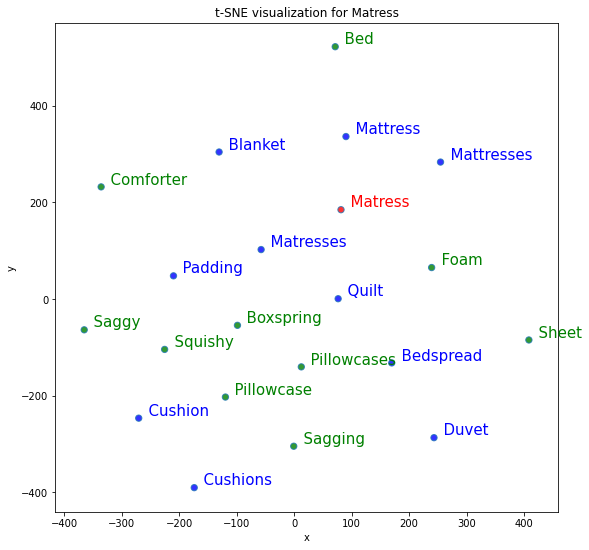

In [ ]:
tsnescatterplot(model, "matress", [t[0] for t in model.wv.most_similar(positive=["matress"], topn=20)][10:])